# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Ames, Iowa. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The goal of the following code is to create a regression model of housing data gathered from Ames, Iowa, in order to predict the sale price of these homes. To use this code, upload the Ames Housing Dataset and run the code. The data will be split into a training set, a validation set, and a test set. The model will be run on each set to determine the effectiveness of the model. We will be able to use the model to better predict sale prices of homes, benefitting our company. We will use the Root Mean Square Error to evaluate our model. The lower the better. The available data is the Ames Housing Data, with 1460 rows. More data would be preferable, but 1460 is acceptable. There are 79 columns, each representing a different feature of data that was collected. Four different learning algorithms will be used, Linear Regression, Decision Tree Regression, Random Forest Regression, and (experimentally) Multi-layer Perception Regressor. Whichever one yields the best results will be used on the test set. The project will be completed over the course of 10 days, spending about 6-8 hours total. We are assuming that the data is accurate. Financial values have not been parsed down to smaller numbers. All categorical null values indicate that the feature is not present at the home. For example, NA in the Alley column is read in as null, but actually means that the home does not have access to an alley. Enjoy.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt



# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv("train.csv")
  return housing
# Call the function to load your dataset here
housing = loadBostonHousingData()

In [ ]:
housing = housing.drop("Id", axis=1)
housing.info()
housing.head(10)

housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


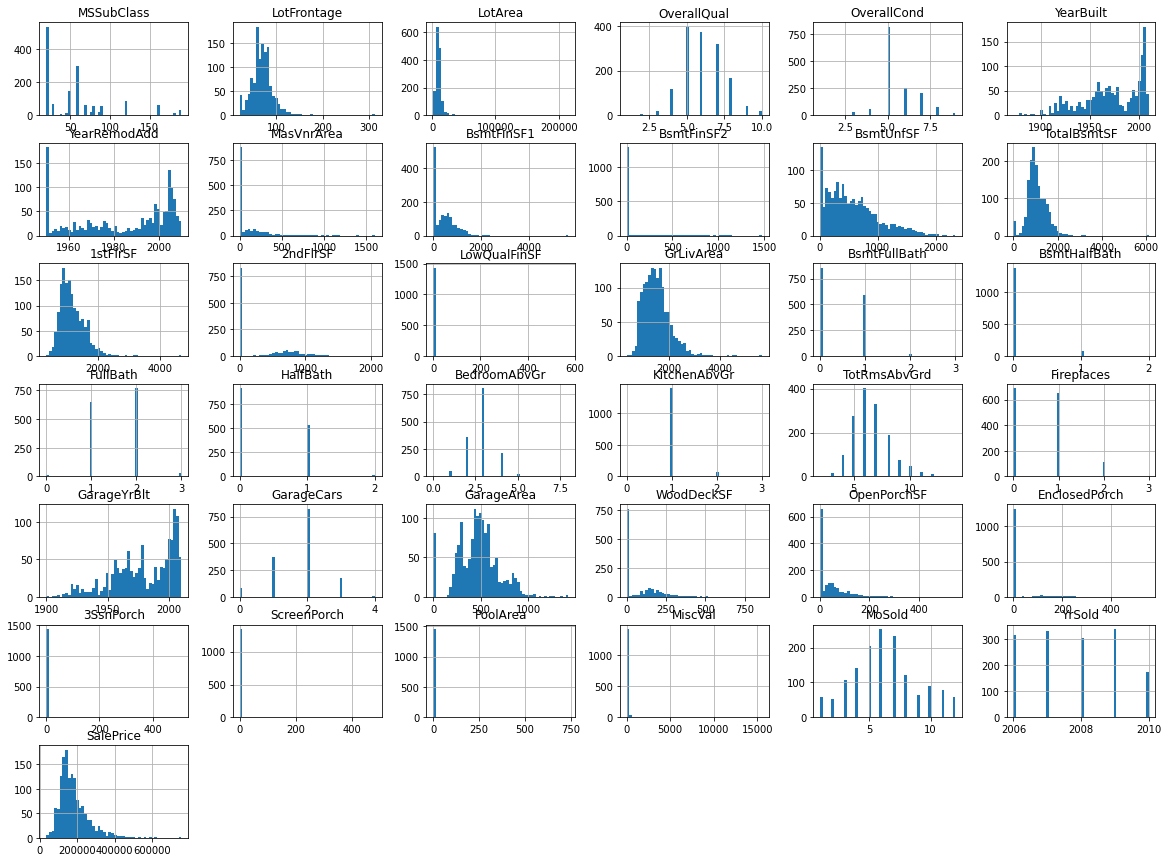

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

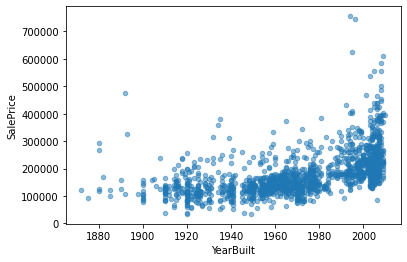

In [ ]:
housing.plot(kind="scatter",y="SalePrice",x="YearBuilt",alpha=0.5)

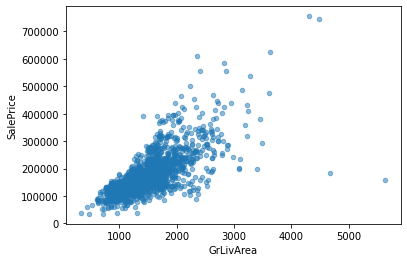

In [ ]:
housing.plot(kind="scatter",y="SalePrice",x="GrLivArea",alpha=0.5)

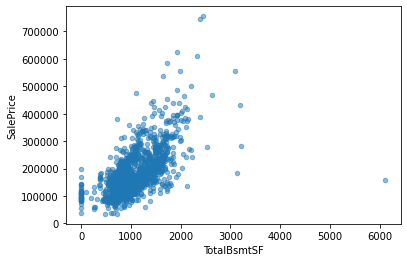

In [ ]:
housing.plot(kind="scatter",y="SalePrice",x="TotalBsmtSF",alpha=0.5)

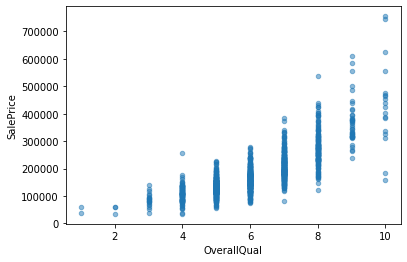

In [ ]:
housing.plot(kind="scatter",y="SalePrice",x="OverallQual",alpha=0.5)

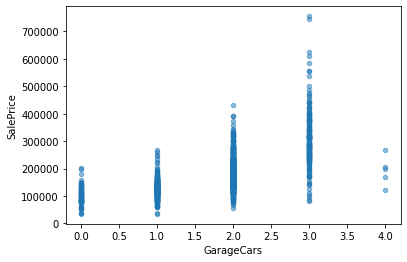

In [ ]:
housing.plot(kind="scatter",y="SalePrice",x="GarageCars",alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7512d4750>,
      dtype=object)

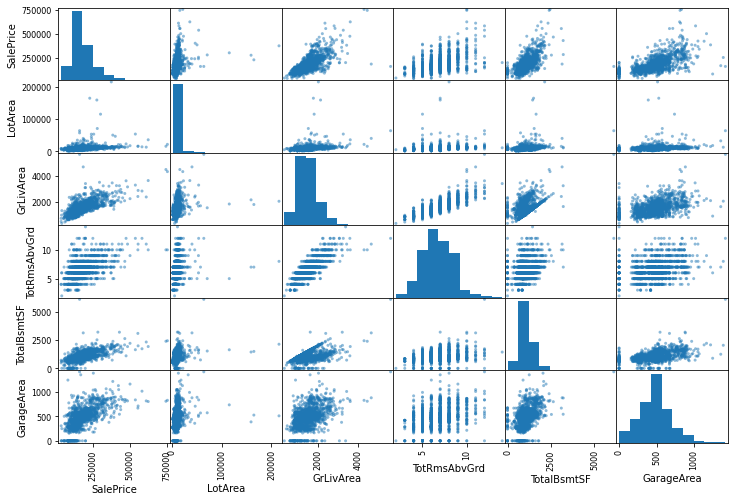

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "LotArea", "GrLivArea", "TotRmsAbvGrd","TotalBsmtSF","GarageArea"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and set, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing)
housing_train, housing_validate = train_test_split(housing_train)

housing_labels = housing_train["SalePrice"].copy()
housing = housing_train.drop("SalePrice", axis=1)

housing_validate_labels = housing_validate["SalePrice"].copy()
housing_validate = housing_validate.drop("SalePrice", axis=1)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

basement, living, garage = 11, 15, 26

housing_num = housing.select_dtypes(include=[np.number])
housing_cat = housing.select_dtypes(exclude=[np.number])
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

class SQFTAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        total_sq_ft = X[:, basement] + X[:, living] + X[:, garage] 
        return np.c_[X, total_sq_ft]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', SQFTAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
      ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
      ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

full_pipeline = ColumnTransformer([
        
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_validate_prepared = full_pipeline.fit_transform(housing_validate)



## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [53852.56493664 38839.44372873 43601.22605884 37501.19442687
 36821.83813245]
Mean: 42123.25345670386
Standard deviation: 6324.760726715462


In [ ]:
lin_valid_scores = cross_val_score(lin_reg, housing_validate_prepared, housing_validate_labels, scoring="neg_mean_squared_error", cv=5)
lin_valid_rmse_scores = np.sqrt(-lin_valid_scores)
display_scores(lin_valid_rmse_scores)

Scores: [ 99179.53076879  88868.86268407 113570.01624598 111320.01401485
 137677.49339709]
Mean: 110123.18342215638
Standard deviation: 16395.503905724458


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [60604.56562134 38385.82473443 50920.81718121 36282.84020214
 37596.85797061]
Mean: 44758.18114194785
Standard deviation: 9516.394945733377


In [ ]:
tree_valid_scores = cross_val_score(tree_reg, housing_validate_prepared, housing_validate_labels, scoring="neg_mean_squared_error", cv=5)
tree_valid_rmse_scores = np.sqrt(-tree_valid_scores)
display_scores(tree_valid_rmse_scores)

Scores: [70787.05464573 35643.69673869 39342.04659741 43061.66433257
 92888.23756367]
Mean: 56344.53997561594
Standard deviation: 22081.99511162017


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [37751.80225043 34489.45094874 44687.98174011 24824.30656528
 25136.61229584]
Mean: 33378.03076008134
Standard deviation: 7607.46079792185


In [ ]:
forest_valid_scores = cross_val_score(forest_reg, housing_validate_prepared, housing_validate_labels, scoring="neg_mean_squared_error", cv=5)
forest_valid_rmse_scores = np.sqrt(-forest_valid_scores)
display_scores(forest_valid_rmse_scores)

Scores: [55226.28852876 25741.51891191 37145.79924625 25388.55382427
 62927.38264736]
Mean: 41285.90863170912
Standard deviation: 15324.372982948


In [ ]:
mlp_reg = MLPRegressor()
mlp_scores = cross_val_score(mlp_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
display_scores(mlp_rmse_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Scores: [203034.54472777 208406.58399345 183326.89607486 191745.87052751
 180478.18728039]
Mean: 193398.41652079532
Standard deviation: 10855.402467769047


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp_valid_scores = cross_val_score(mlp_reg, housing_validate_prepared, housing_validate_labels, scoring="neg_mean_squared_error", cv=5)
mlp_valid_rmse_scores = np.sqrt(-mlp_valid_scores)
display_scores(mlp_valid_rmse_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Scores: [223994.2562913  193222.84581995 195134.8705563  205644.65105958
 204910.85322491]
Mean: 204581.49539040859
Standard deviation: 10921.096127915409


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=12),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

37472.83520567644 {'max_features': 7, 'n_estimators': 180}
36162.47711896894 {'max_features': 11, 'n_estimators': 72}
38583.24716077928 {'max_features': 5, 'n_estimators': 103}
37245.39944648443 {'max_features': 10, 'n_estimators': 75}
36283.80855891814 {'max_features': 11, 'n_estimators': 88}
38627.6137785344 {'max_features': 5, 'n_estimators': 100}
37792.82352605116 {'max_features': 8, 'n_estimators': 152}
39084.495234733324 {'max_features': 3, 'n_estimators': 150}
49383.20781503626 {'max_features': 5, 'n_estimators': 2}
37768.294929387586 {'max_features': 8, 'n_estimators': 158}


In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
cat_pipe = full_pipeline.named_transformers_["cat"]
cat_encoder = cat_pipe.named_steps["encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
extra_attrb = ["total_sq_ft"]
attributes = num_attribs + cat_one_hot_attribs + extra_attrb
sorted(zip(feature_importances, attributes), reverse=True)

[(0.0680731606603791, 'C (all)'),
 (0.05513844697787489, 'GarageCars'),
 (0.049130116970628634, '1stFlrSF'),
 (0.03963733096195518, 'OverallQual'),
 (0.03788344870124606, 'GarageArea'),
 (0.036333740302627066, 'TotalBsmtSF'),
 (0.035990746473876394, 'GrLivArea'),
 (0.03242434724722099, 'FullBath'),
 (0.026337450123512816, 'YearBuilt'),
 (0.02492552489506581, 'BsmtFinSF1'),
 (0.021278688122516834, 'LotArea'),
 (0.01999484402304556, '2ndFlrSF'),
 (0.01995480770649739, 'YearRemodAdd'),
 (0.016732595597021567, 'Fireplaces'),
 (0.01661621413144484, 'GarageYrBlt'),
 (0.015681658077756674, 'OpenPorchSF'),
 (0.015317230096081873, 'TotRmsAbvGrd'),
 (0.014806100979713925, 'LotFrontage'),
 (0.013236799292262059, 'MasVnrArea'),
 (0.010035510456621832, 'BsmtUnfSF'),
 (0.00812860068369111, 'WoodDeckSF'),
 (0.007394466434204197, 'BedroomAbvGr'),
 (0.007199307574872997, 'HalfBath'),
 (0.007159989971988097, 'MSSubClass'),
 (0.005242901439200453, 'YrSold'),
 (0.005126854162265769, 'MoSold'),
 (0.0045703

In [ ]:
final_model = rnd_search.best_estimator_
y_test = housing_test["SalePrice"].copy()
X_test = housing_test.drop("SalePrice", axis=1)

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = cross_val_score(final_model, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=5)
final_rmse_scores = np.sqrt(-final_predictions)
display_scores(final_rmse_scores)

Scores: [24143.99830218 59945.57051076 27527.67975247 19674.13829435
 29617.91926405]
Mean: 32181.861224763135
Standard deviation: 14283.620900445816


In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions.mean() - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

99      6.333492e+17
967     6.333588e+17
655     6.332840e+17
1342    6.335076e+17
1180    6.335418e+17
            ...     
127     6.332824e+17
1316    6.336143e+17
722     6.333421e+17
1039    6.332713e+17
1188    6.334543e+17
Name: SalePrice, Length: 365, dtype: float64


array([7.95870851e+08, 7.95885890e+08])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

This machine learning model uses the various data attributes of homes, numerical and categorical, to algorithmically predict the sale price of these homes in Ames, Iowa, within 95% accuracy. Being able to predict this price will allow us to better price real estate so that we can make more money. The largest contributing factor to the price of the home is the Overall Quality, rated 1-10. However, this data point is not the most meaningful because it may be subjective and is not the most detailed. The most likely best approximator of a house's sale price is the above ground living area square footage. Aspects that least affect a home's sale price are the Zoning (RL, FV), the Miscellaneous value of house features, and the square footage of a 3 season porch. Moving forward, to create more accurate predictions, more data points should be collected, as well as collecting more differect categories of data, such as coordinates and median income in the area. Overall, the model is very accurate, and will help us improve our rating drastically.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!